Q1. What is the mathematical formula for a linear SVM?

Ans1- A linear SVM finds a hyperplane that separates the data into two classes. The mathematical formula for a linear SVM is:

f(x) = sign(w · x + b)

where f(x) is the predicted class for a given input x, w is the weight vector, b is the bias term, and · denotes the dot product.

Q2. What is the objective function of a linear SVM?

Ans2-The objective function of a linear SVM is to maximize the margin between the two classes while minimizing the classification error. This can be formulated as:

minimize 1/2 ||w||^2 subject to y_i (w · x_i + b) >= 1 for all i

where w is the weight vector, b is the bias term, x_i is the i-th input vector, y_i is the corresponding class label (-1 or +1), and ||w|| is the Euclidean norm of w.

Q3. What is the kernel trick in SVM?

Ans3- The kernel trick in SVM is a way to map the input data into a higher-dimensional space without actually computing the transformed feature space. This is achieved by using a kernel function, which is a measure of similarity between two vectors in the input space. The kernel function implicitly maps the input vectors into a higher-dimensional space where they are easier to separate linearly. This makes it possible to use SVM for non-linearly separable data.

Q4. What is the role of support vectors in SVM Explain with example

Ans4- Support vectors are the data points closest to the hyperplane and are the most informative points for the decision boundary. They determine the margin of the hyperplane and hence the classification boundary.

For example, consider a dataset with two classes that are not linearly separable. We can use a kernel function to map the data into a higher-dimensional space where it is possible to find a hyperplane that separates the classes. After finding the hyperplane, the support vectors are the data points that lie closest to the margin. These are the points that are most relevant for the classification and are used to define the margin and the decision boundary.

Q5. Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin and Hard margin in SVM?

Ans5- 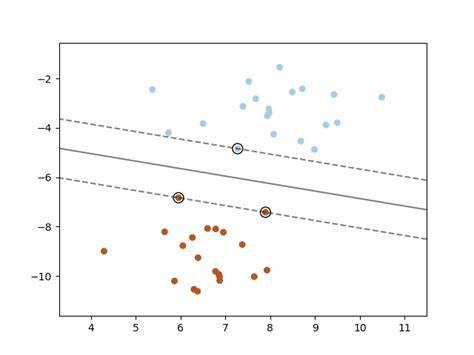

In SVM, a hyperplane is a decision boundary that separates the data into different classes. The objective of SVM is to find the hyperplane that maximizes the margin between the two classes. The margin is the distance between the hyperplane and the closest data points from both classes.

A hard margin SVM is a classification technique that aims to find a hyperplane that separates the data points into two classes without any misclassification. However, in most real-world scenarios, data is not linearly separable, and a hard margin SVM may not be feasible. 

A soft margin SVM is a modification of the hard margin SVM that allows for some misclassification of the data points to achieve a better separation.

https://i.imgur.com/NDHnig

In the above image, we can see that the hard margin SVM is unable to separate the two classes since the data points are not linearly separable. On the other hand, the soft margin SVM allows for some misclassification and finds a hyperplane that achieves the maximum margin possible.

The marginal plane is the hyperplane that is parallel to the hyperplane but closest to the support vectors. The support vectors are the data points that lie closest to the hyperplane and play a crucial role in the SVM algorithm.

In summary, the hyperplane is the decision boundary that separates the data points into two classes, the margin is the distance between the hyperplane and the closest data points, the support vectors are the data points closest to the hyperplane, and the marginal plane is the hyperplane that is closest to the support vectors. The hard margin SVM aims to find a hyperplane that separates the data points without any misclassification, while the soft margin SVM allows for some misclassification to achieve a better separation.


Q6. SVM Implementation through Iris dataset.
* Load the iris dataset from the scikit-learn library and split it into a training set and a testing setl
* Train a linear SVM classifier on the training set and predict the labels for the testing setl
* Compute the accuracy of the model on the testing setl
* Plot the decision boundaries of the trained model using two of the featuresl
* Try different values of the regularisation parameter C and see how it affects the performance of the model.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn.datasets import load_iris

In [3]:
dataset=load_iris()

In [4]:
print(dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
df=pd.DataFrame(dataset.data,columns=dataset.feature_names)

In [7]:
print(dataset.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [8]:
df['target']=dataset.target

In [9]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
df['target'].unique()

array([0, 1, 2])

In [11]:
df_copy=df[df['target']!=2]

In [12]:
df_copy['target'].unique()

array([0, 1])

In [13]:
## Independent and dependent features
X=df_copy.iloc[:,:-1]
y=df_copy.iloc[:,-1]

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=10)

In [17]:
from sklearn.svm import SVC

In [18]:
svc=SVC(kernel='linear')

In [19]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [20]:
svc.coef_

array([[ 3.38933933e-04, -5.94831543e-01,  9.66191712e-01,
         4.46377857e-01]])

In [21]:
## prediction
y_pred=svc.predict(X_test)

In [22]:
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1])

In [23]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [24]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        13

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25

[[12  0]
 [ 0 13]]
1.0


In [25]:
## Hyperparameter tunning with SVC

In [26]:
from sklearn.model_selection import GridSearchCV

#define parameter range
param_grid={'C':[.1,1,10,100,1000],
           'gamma':[1,.1,.01,.001,.0001],
           'kernel':['linear']}

In [27]:
grid=GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [28]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [29]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [30]:
## prediction
y_pred4=grid.predict(X_test)
print(classification_report(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))
print(accuracy_score(y_test,y_pred4))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        13

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25

[[12  0]
 [ 0 13]]
1.0
